# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


Learned coefficient (m): 1.9837545163983668
Learned intercept (c): 2.9955635161407717

Training Evaluation:
MAE: 0.7382500950471483
MSE: 0.8555732699593468
R²: 0.9750697063586937

Testing Evaluation:
MAE: 0.7754919475367819
MSE: 0.9218463917947236
R²: 0.9710185982152144


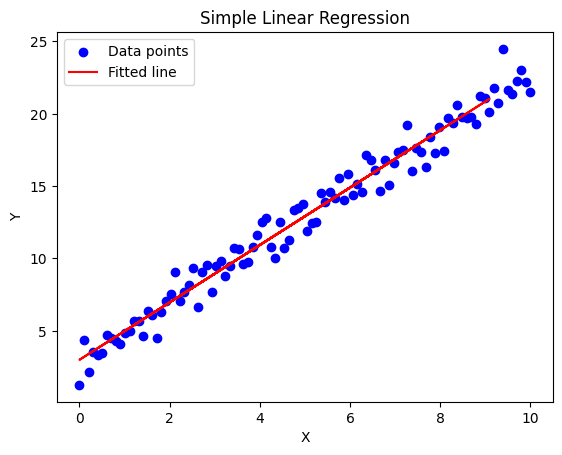

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

m = 2
c = 3
def generate_y(x):
    noise = np.random.normal(0, 1, size=x.shape)
    return m * x + c + noise

x = np.linspace(0, 10, 100)
y = generate_y(x)


X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


print("Learned coefficient (m):", model.coef_[0])
print("Learned intercept (c):", model.intercept_)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\nTraining Evaluation:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R²:", r2_score(y_train, y_train_pred))

print("\nTesting Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R²:", r2_score(y_test, y_test_pred))


plt.scatter(x, y, color='blue', label='Data points')
plt.plot(X_test, y_test_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



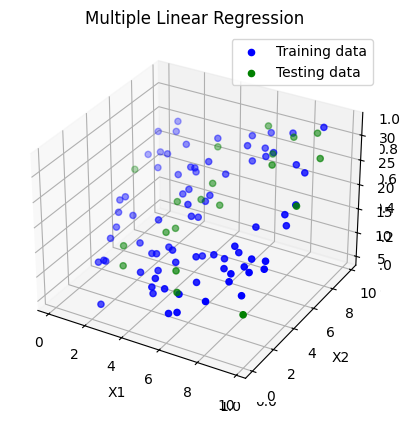

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

a1 = 1
a2 = 2
c = 3
def generate_y(x1, x2):
    noise = np.random.normal(0, 1, size=x1.shape)
    return a1 * x1 + a2 * x2 + c + noise


x1 = np.random.uniform(0, 10, 100)
x2 = np.random.uniform(0, 10, 100)
y = generate_y(x1, x2)
ax = fig.add_subplot(111, projection='3d')
X_train, X_test, y_train, y_test = train_test_split(np.column_stack((x1, x2)), y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='Training data')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='green', label='Testing data')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Multiple Linear Regression')
plt.legend()
plt.show()

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.




Training Evaluation:
MAE: 0.9048307677110919
MSE: 1.160744319034653
R²: 0.9990161474065329

Testing Evaluation:
MAE: 0.9672674038877558
MSE: 1.312400376490268
R²: 0.9991877994398772


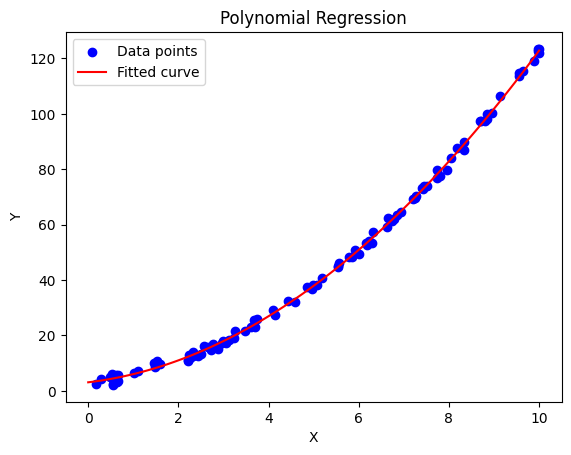

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

a = 1
b = 2
c = 3

def generate_y(x):
   noise = np.random.normal(0, 1, size=x.shape)
   return a * x**2 + b * x + c + noise
X = np.random.uniform(0, 10, 100)
y = generate_y(X)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.reshape(-1, 1))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\nTraining Evaluation:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R²:", r2_score(y_train, y_train_pred))

print("\nTesting Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R²:", r2_score(y_test, y_test_pred))

import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Data points')
X_range = np.linspace(0, 10, 100)
X_range_poly = poly.transform(X_range.reshape(-1, 1))
y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color='red', label='Fitted curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [6]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\dell\.cache\kagglehub\datasets\rohitgrewal\airlines-flights-data\versions\1


In [7]:
os.listdir(path)

['airlines_flights_data.csv']

In [8]:
full_path = os.path.join(path,os.listdir(path)[0])

In [9]:
import pandas as pd
df = pd.read_csv(full_path)

In [10]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*


In [11]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [12]:
df.isnull().sum()
df.dropna(inplace=True)
df.duplicated().sum()

np.int64(0)

In [13]:
df.dtypes

index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

<Axes: title={'center': 'price'}, xlabel='departure_time'>

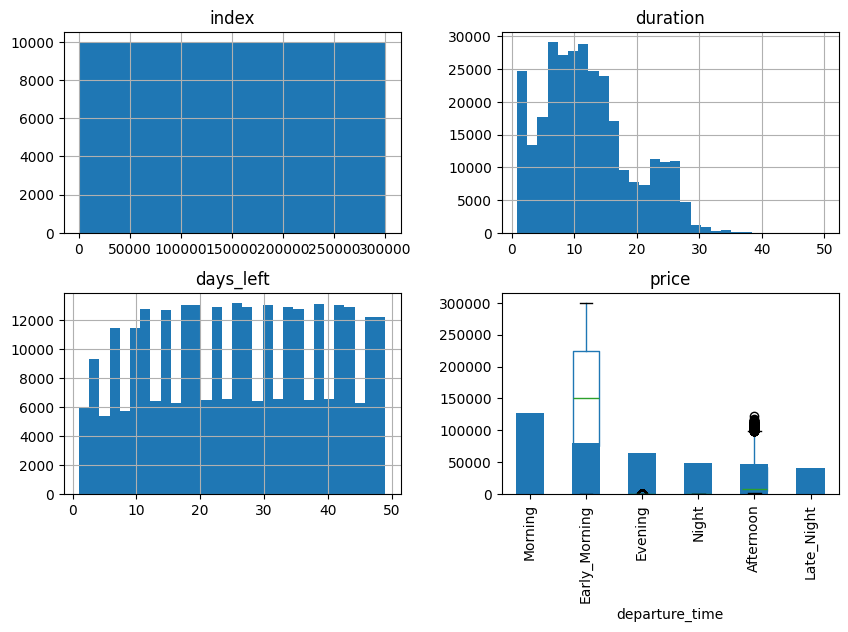

In [14]:
df.hist(figsize=(10, 10), bins=30)
df.boxplot(figsize=(10, 10))
df['airline'].value_counts().plot(kind='bar', figsize=(10, 6))
df['source_city'].value_counts().plot(kind='bar', figsize=(10, 6))
df['destination_city'].value_counts().plot(kind='bar', figsize=(10, 6))
df['departure_time'].value_counts().plot(kind='bar', figsize=(10, 6))

In [ ]:
# Identify correlations between features and target
import seaborn as sns
correlation_matrix = df.corr()
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()

ValueError: plot kind scatter can only be used for data frames

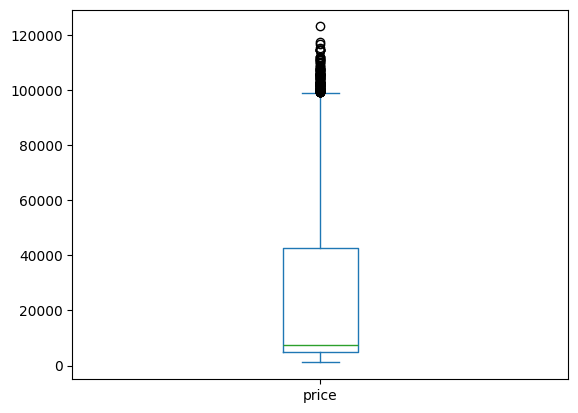

In [ ]:

IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)
Z_score = (df['price'] - df['price'].mean()) / df['price'].std()

df['price'].plot(kind='box',)
df['price'].plot(kind='scatter', x='days_left', y='price')
df['price'].plot(kind='scatter', x='stops', y='price')
df['price'].plot(kind='scatter', x='airline', y='price')
df['price'].plot(kind='scatter', x='class', y='price')

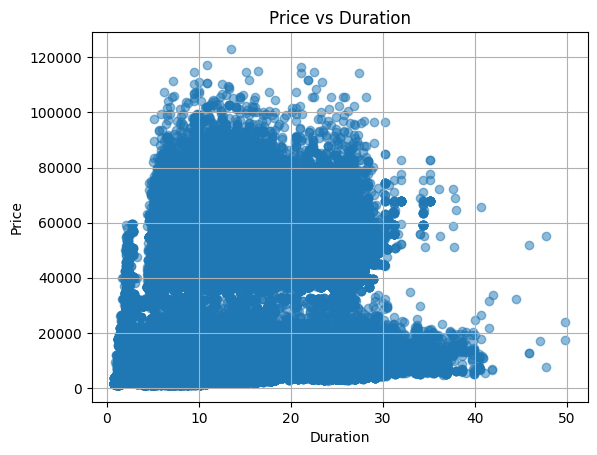

In [ ]:
# Scatter plot: Price vs Duration
plt.scatter(df['duration'], df['price'], alpha=0.5)
plt.title('Price vs Duration')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.grid()
plt.show()

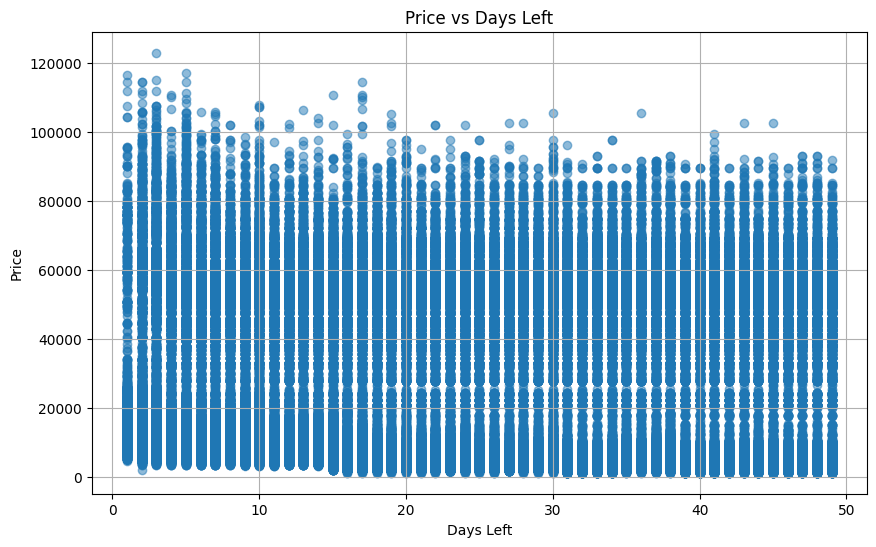

In [17]:
# Scatter plot: Price vs Days Left
plt.figure(figsize=(10, 6))
plt.scatter(df['days_left'], df['price'], alpha=0.5)
plt.title('Price vs Days Left')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.grid()
plt.show()

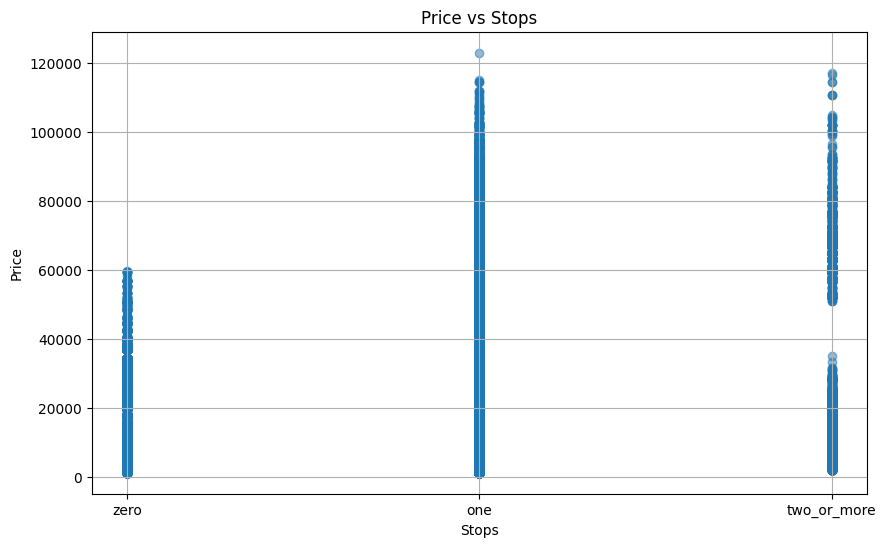

In [18]:
# Scatter plot: Price vs Stops
plt.figure(figsize=(10, 6))
plt.scatter(df['stops'], df['price'], alpha=0.5)
plt.title('Price vs Stops')
plt.xlabel('Stops')
plt.ylabel('Price')
plt.grid()
plt.show()

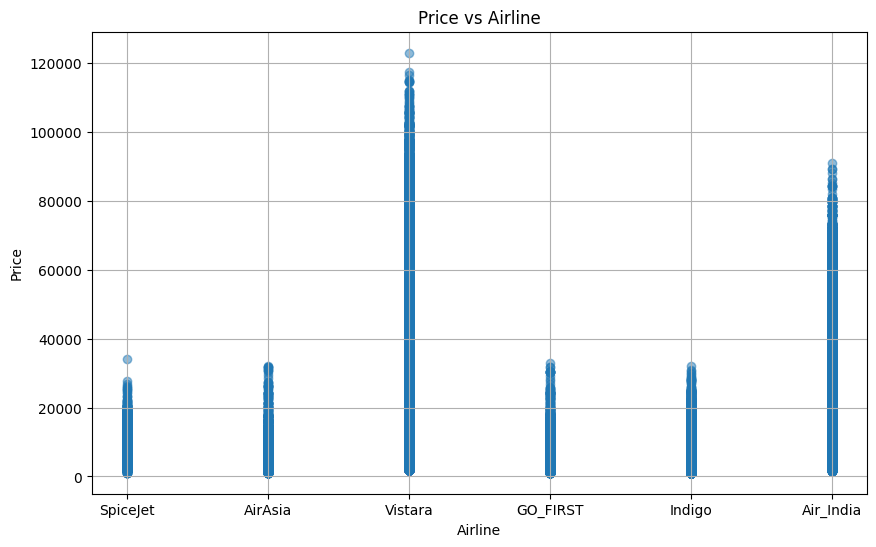

In [19]:
# Scatter plot: Price vs Airline
plt.figure(figsize=(10, 6))
plt.scatter(df['airline'], df['price'], alpha=0.5)
plt.title('Price vs Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.grid()
plt.show()

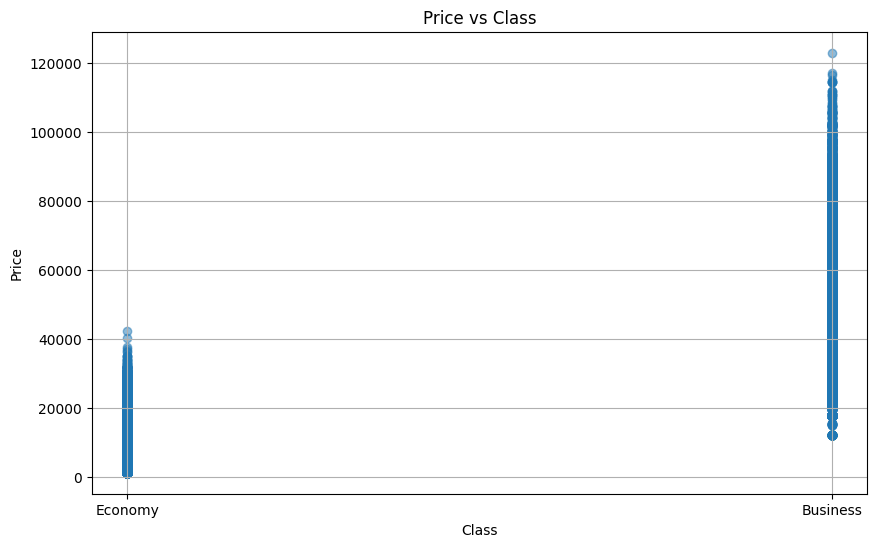

In [20]:
# Scatter plot: Price vs Class
plt.figure(figsize=(10, 6))
plt.scatter(df['class'], df['price'], alpha=0.5)
plt.title('Price vs Class')
plt.xlabel('Class')
plt.ylabel('Price')
plt.grid()
plt.show()